## Import Modules

In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [24]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [25]:
len(paths)

2800

In [26]:
paths[:5]

['C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [27]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [28]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toro...,angry
1,C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toro...,angry
2,C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toro...,angry
3,C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toro...,angry
4,C:/Users/vedan/OneDrive/Desktop/AIML/TESS Toro...,angry


In [29]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

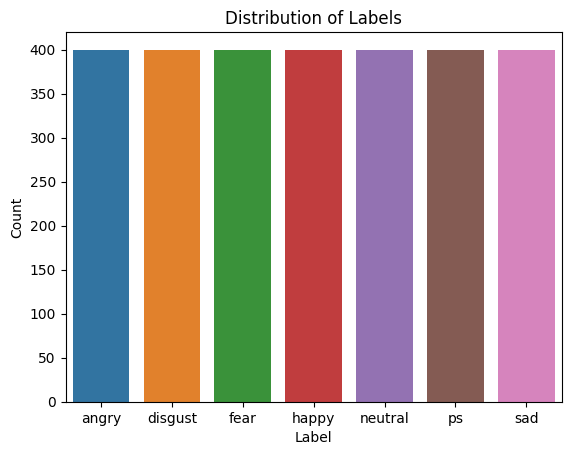

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'label' is a valid column in your DataFrame
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [31]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

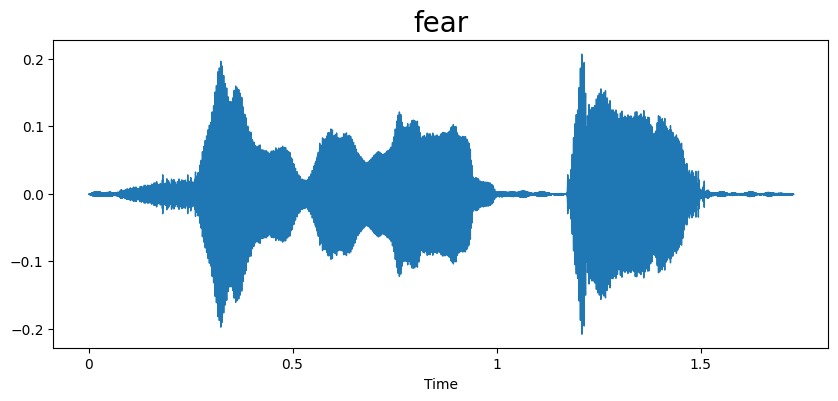

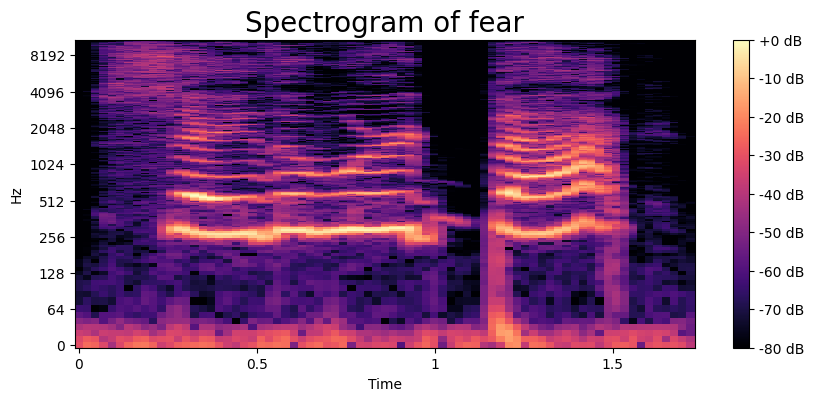

In [32]:
# Define the emotion
emotion = 'fear'

# Assuming you have a DataFrame 'df' with columns 'speech' and 'label'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Create a waveform plot
plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Create a spectrogram
plt.figure(figsize=(10, 4))
plt.title(f'Spectrogram of {emotion}', size=20)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play the audio
Audio(data, rate=sampling_rate)

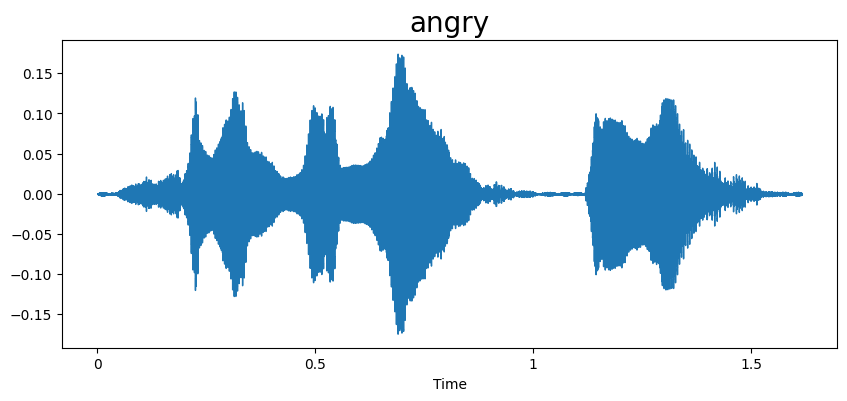

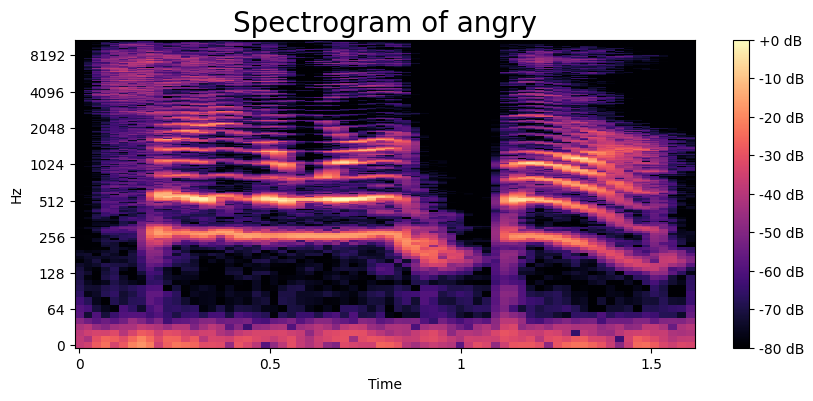

In [33]:
# Define the emotion
emotion = 'angry'

# Assuming you have a DataFrame 'df' with columns 'speech' and 'label'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)

# Create a waveform plot
plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Create a spectrogram
plt.figure(figsize=(10, 4))
plt.title(f'Spectrogram of {emotion}', size=20)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play the audio
Audio(data, rate=sampling_rate)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

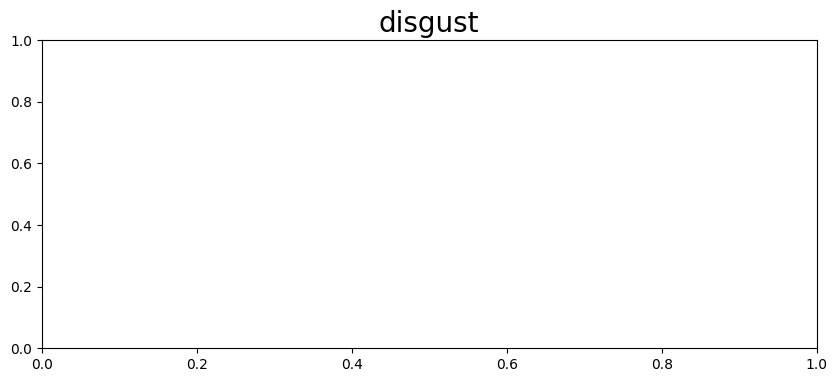

In [34]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

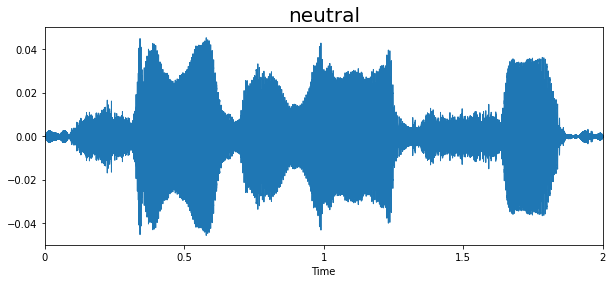

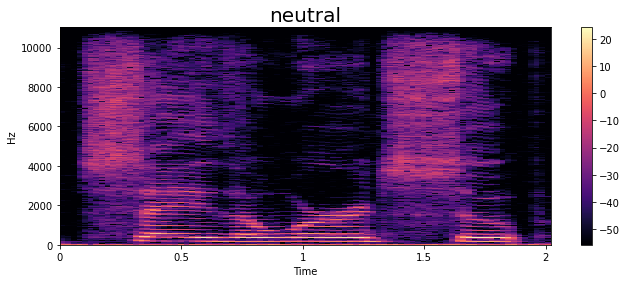

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

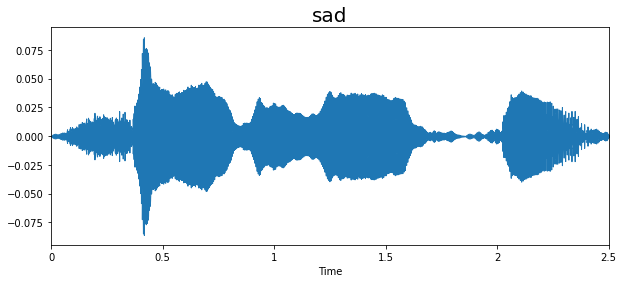

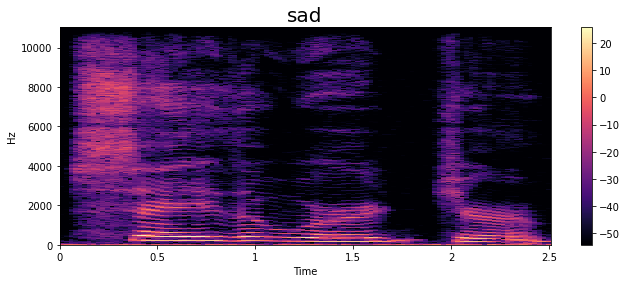

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

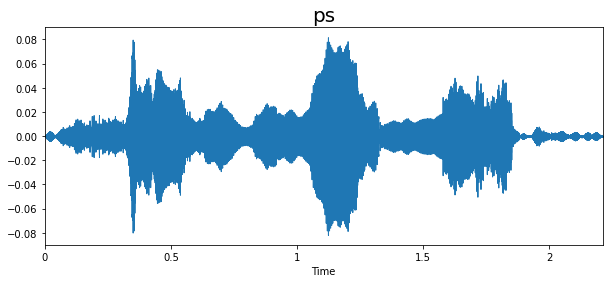

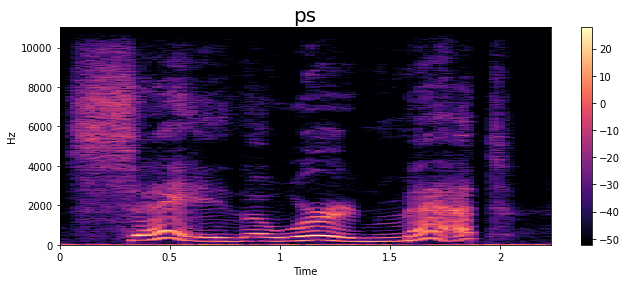

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

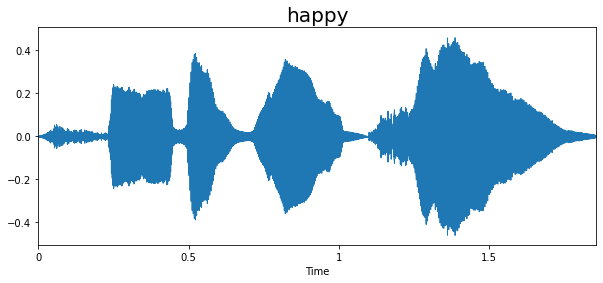

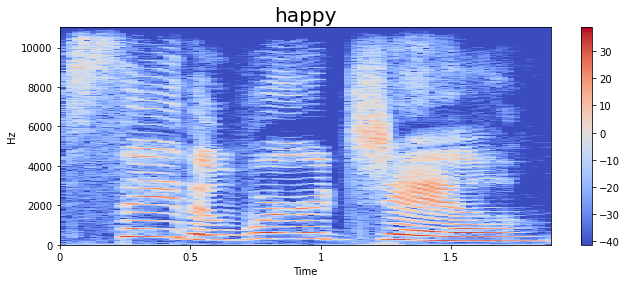

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-285.2542    ,   86.24267   ,   -2.7735834 ,   22.61731   ,
        -15.214631  ,   11.602871  ,   11.931779  ,   -2.5318177 ,
          0.65986294,   11.62756   ,  -17.814924  ,   -7.5654893 ,
          6.2167835 ,   -3.7255652 ,   -9.563306  ,    3.899267  ,
        -13.657834  ,   14.420068  ,   19.243341  ,   23.024492  ,
         32.129776  ,   16.585697  ,   -4.137755  ,    1.2746525 ,
        -11.517016  ,    7.0145273 ,   -2.8494127 ,   -7.415011  ,
        -11.150621  ,   -2.1190548 ,   -5.4515266 ,    4.473824  ,
        -11.377713  ,   -8.931878  ,   -3.8482094 ,    4.950994  ,
         -1.7254968 ,    2.659218  ,   11.390564  ,   11.3327265 ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-285.2542, 86.24267, -2.7735834, 22.61731, -1...
1       [-348.23337, 35.60242, -4.365128, 15.534869, 6...
2       [-339.50308, 54.41241, -14.795754, 21.566118, ...
3       [-306.92944, 21.973307, -5.1588626, 7.6269317,...
4       [-344.88586, 47.05694, -24.83122, 20.24406, 1....
                              ...                        
2795    [-374.1317, 61.859463, -0.41998756, 9.31088, -...
2796    [-314.12222, 40.262157, -6.7909045, -3.2963052...
2797    [-357.65854, 78.49201, -15.684815, 3.644915, -...
2798    [-352.78336, 102.219765, -14.560364, -11.48181...
2799    [-389.80002, 54.120773, 0.8988281, -0.6595729,...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 7)               

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 18ms/step - loss: 1.0892 - accuracy: 0.6201 - val_loss: 2.0684 - val_accuracy: 0.2946
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3742 - accuracy: 0.8598 - val_loss: 2.4078 - val_accuracy: 0.2054
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1671 - accuracy: 0.9487 - val_loss: 1.9055 - val_accuracy: 0.4446
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1672 - accuracy: 0.9442 - val_loss: 2.7364 - val_accuracy: 0.3179
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9683 - val_loss: 1.8414 - val_accuracy: 0.5607
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1082 - accuracy: 0.9585 - val_loss: 2.7303 - val_accuracy: 0.4679
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1275 - accuracy: 0.9656 - val_loss: 1.2245 - val_accuracy: 0.7232
Epoch 8/50
35/35 [=

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

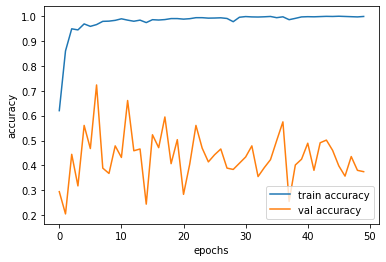

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

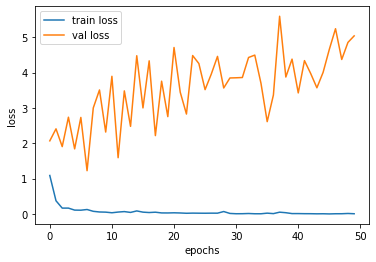

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()